# IRIS FLOWER CLASSIFICATION WITH MACHINE LEARNING

A machine learning model to predict how much of a product will buy in future.
ALGORITHM : Decision Tree Classifier
INPUT : Iris masurements
OUTPUT: Iris Flower Type

In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Importing Data Frame
df = pd.DataFrame(pd.read_csv(r"C:\Users\SIVASRI\Downloads\OASIS\Iris.csv"))

In [4]:
# Overview of a data frame
print("Size of Data Frame: ",df.size)
df.head()

Size of Data Frame:  900


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# List of columns in the data frame
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Fetching Iris types
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# Transforming Iris types into numeric values
resd = dict( zip ( df['Species'].unique(), [ i for i in range(1,len(df['Species'].unique())+1) ] ) )
df['Species'] = df['Species'].map(resd)

In [8]:
# Analyzing the relation between the data available
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [9]:
# Checking for null values
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

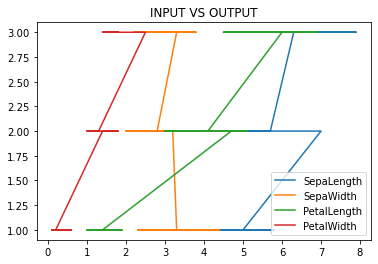

In [10]:
# Data Visualization : INPUT DATA VS OUTPUT
plt.plot(df.SepalLengthCm,df.Species,label = 'SepaLength')
plt.plot(df.SepalWidthCm,df.Species,label = 'SepaWidth')
plt.plot(df.PetalLengthCm,df.Species,label = 'PetalLength')
plt.plot(df.PetalWidthCm,df.Species,label = 'PetalWidth')
plt.title("INPUT VS OUTPUT")
plt.legend()
plt.show()

In [11]:
# Taking input and output variables
x = df.drop(['Id','Species'],axis =1)
y = df['Species']

In [12]:
# Splitting the data into train and test sets
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size = 0.1)

In [13]:
# Building and training the model
model = DecisionTreeClassifier()
model.fit(x_tr,y_tr)
pred = model.predict(x_ts)

In [14]:
# Measuring Accuracy
accuracy_score(y_ts,pred)

1.0

In [15]:
#predicting with the model
sl = float(input("SepalLengthCm"))
sw = float(input("SepalWidthCm"))
pl = float(input("PetalLengthCm"))
pw = float(input("PetalWidthCm"))
resi = model.predict([[sl,sw,pl,pw]])[0]
print('Predicted Iris flower type is: ',list(resd.keys())[list(resd.values()).index(resi)].upper())

SepalLengthCm0.7
SepalWidthCm-0.3
PetalLengthCm0.8
PetalWidthCm0.8
Predicted Iris flower type is:  IRIS-SETOSA


C:\Users\SIVASRI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


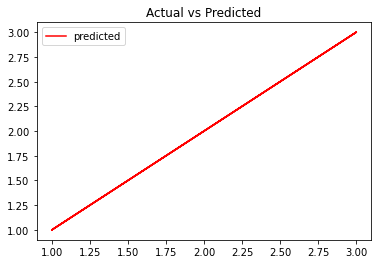

In [16]:
# Actual data vs predicted data
plt.plot(y_ts,pred,color = 'red',label = 'predicted')
plt.title("Actual vs Predicted")
plt.legend()
plt.show()